In [1]:
import sys
sys.path.append("../")
import helper

from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime, DataFrame, merge,read_csv,concat
import pandas
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from pmdarima.arima import auto_arima
import seaborn as sb
from sklearn.decomposition import PCA #주성분 분석용 패키지
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

In [2]:
public=read_csv('./추가자료/세종특별자치시_공공기관현황_20221107.csv',encoding='euc-kr')
public.head()
public['읍면동명']=public['지번주소'].str.split(' ').str[1]
public.head()
public1=DataFrame(public['읍면동명'].value_counts())
public1.head()
public2=public1.reset_index('읍면동명')
public2.rename(columns={'count':'공공기관수'},inplace=True)
public2.head()

,읍면동명,공공기관수
0,조치원읍,9
1,보람동,5
2,연서면,2
3,전동면,2
4,도담동,1


In [3]:
old=read_csv('./추가자료/세종특별자치시_노인복지시설 현황_20221104.csv',encoding='euc-kr')
old.head(1)
old['읍면동명']=old['소재지 주소'].str.split(' ').str[0]
old.head()
old1=DataFrame(old['읍면동명'].value_counts())
old1
old1.reset_index('읍면동명',inplace=True)
old1.rename(columns={'count':'노인복지시설수'},inplace=True)
old1.head()

,읍면동명,노인복지시설수
0,조치원읍,17
1,연서면,4
2,금남면,4
3,전의면,3
4,전동면,3


In [4]:
green=read_csv('./추가자료/세종특별자치시_녹지현황_20230323.csv',encoding='euc-kr')
green.head()
green1=DataFrame(green['생활권'].value_counts())
green1.reset_index('생활권',inplace=True)
green1.rename(columns={'생활권':'읍면동명','count':'녹지개수'},inplace=True)
green1.head()

,읍면동명,녹지개수
0,고운동,49
1,한솔동,40
2,아름동,29
3,새롬동,16
4,반곡동,16


In [5]:
hospital=read_csv('./추가자료/세종특별자치시_병원_20221115.csv',encoding='euc-kr')
hospital.head()
hospital1=DataFrame(hospital['읍면동명'].value_counts())
hospital1.reset_index('읍면동명',inplace=True)
hospital1.rename(columns={'count':'병원수'},inplace=True)
hospital1.head()

,읍면동명,병원수
0,조치원읍,75
1,나성동,57
2,종촌동,32
3,어진동,28
4,새롬동,28


In [6]:
health_center=read_csv('./추가자료/세종특별자치시_보건기관 현황_20230609.csv',encoding='euc-kr')
health_center.head()
health_center['읍면동명']=health_center['소재지'].str.split(' ').str[1]
health_center
health_center1=DataFrame(health_center['읍면동명'].value_counts())
health_center1
health_center1.reset_index('읍면동명',inplace=True)
health_center1.rename(columns={'count':'보건소수'},inplace=True)
health_center1.head()

,읍면동명,보건소수
0,연서면,3
1,연동면,2
2,금남면,2
3,전의면,2
4,전동면,2


In [7]:
disable=read_csv('./추가자료/세종특별자치시_장애인복지시설_20221103.csv',encoding='euc-kr')
disable.head()
disable['읍면동명']=disable['소재지'].str.split(' ').str[1]
disable.head()
disable1=DataFrame(disable['읍면동명'].value_counts())
disable1.reset_index('읍면동명',inplace=True)
disable1.rename(columns={'count':'장애인시설'},inplace=True)
disable1

,읍면동명,장애인시설
0,조치원읍,6
1,종촌동,4
2,전동면,3
3,전의면,3
4,아름동,2
5,보람동,1
6,연기면,1
7,연서면,1


In [8]:
gym=read_csv('./추가자료/세종특별자치시_체육시설업현황_20221130.csv',encoding='euc-kr')
gym.head()
gym1=gym.filter(['업종','상호','시설주소(지번)'])
gym1['읍면동명']=gym1['시설주소(지번)'].str.split(' ').str[1]
gym1
gym2=DataFrame(gym1['읍면동명'].value_counts())
gym2.reset_index('읍면동명',inplace=True)
gym2.rename(columns={'count':'체육시설수'},inplace=True)
gym2.head()

,읍면동명,체육시설수
0,조치원읍,70
1,아름동,30
2,나성동,29
3,고운동,23
4,보람동,22


In [9]:
school=read_excel('./추가자료/세종특별자치시교육청_세종시 학교급별 학교현황(년도별)_20220428.xlsx')
school.head()
school1=DataFrame(school['지역'].value_counts())
school1.reset_index('지역',inplace=True)
school1.rename(columns={'지역':'읍면동명','count':'학교수'},inplace=True)
school1.head()

,읍면동명,학교수
0,도담동,18
1,고운동,16
2,새롬동,15
3,조치원읍,12
4,반곡동,10


In [10]:
main=read_excel('./엑셀자료/2023년_8월말_인구현황_최종수정.xlsx')
main.head()
main1=main.drop(0) #첫번째 행 제거
main2=main1.filter(['구분','행정구별_공영주차장_주차면수','행정구별_공영주차장_유무','행정구별_공원수','행정구별_사업체수','행정구별_자동차_등록현황','전체인구','세대당_인구'])
main2.rename(columns={'구분':'읍면동명'},inplace=True)
main2.head()

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구
1,조치원읍,374,y,16,5141,21246,43324,2.02
2,연기면,0,n,1,437,1677,2628,1.66
3,연동면,0,n,0,529,2125,3078,1.73
4,부강면,0,n,1,1345,4515,5966,1.79
5,금남면,0,n,2,1338,5383,8794,1.78


In [11]:
tmp=main2.merge(public2,on='읍면동명',how='left')
tmp.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0


In [12]:
tmp1=tmp.merge(old1,on='읍면동명',how='left')
tmp1.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0,17.0


In [13]:
tmp2=tmp1.merge(green1,on='읍면동명',how='left')
tmp2.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0,17.0,NaN


In [14]:
tmp3=tmp2.merge(hospital1,on='읍면동명',how='left')
tmp3.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0,17.0,NaN,75.0


In [15]:
tmp4=tmp3.merge(health_center1,on='읍면동명',how='left')
tmp4.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0,17.0,NaN,75.0,1.0


In [16]:
tmp5=tmp4.merge(disable1,on='읍면동명',how='left')
tmp5.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0,17.0,NaN,75.0,1.0,6.0


In [17]:
tmp6=tmp5.merge(gym2,on='읍면동명',how='left')
tmp6.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설,체육시설수
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0,17.0,NaN,75.0,1.0,6.0,70.0


In [18]:
tmp7=tmp6.merge(school1,on='읍면동명',how='left')
tmp7.head(1)

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설,체육시설수,학교수
0,조치원읍,374,y,16,5141,21246,43324,2.02,9.0,17.0,NaN,75.0,1.0,6.0,70.0,12.0


In [23]:
origin=tmp7.fillna(0)
origin['행정구별_공영주차장_유무'].replace({'y':1,'n':0},inplace=True)
origin

,읍면동명,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설,체육시설수,학교수
0,조치원읍,374,1,16,5141,21246,43324,2.02,9.0,17.0,0.0,75.0,1.0,6.0,70.0,12.0
1,연기면,0,0,1,437,1677,2628,1.66,1.0,1.0,0.0,2.0,1.0,1.0,5.0,4.0
2,연동면,0,0,0,529,2125,3078,1.73,1.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0
3,부강면,0,0,1,1345,4515,5966,1.79,1.0,0.0,0.0,10.0,1.0,0.0,11.0,4.0
4,금남면,0,0,2,1338,5383,8794,1.78,1.0,4.0,0.0,11.0,2.0,0.0,13.0,5.0
5,장군면,0,0,0,1176,5051,7184,1.61,1.0,1.0,0.0,6.0,2.0,0.0,14.0,5.0
6,연서면,0,0,0,1088,4598,7261,1.84,2.0,4.0,0.0,7.0,3.0,1.0,6.0,10.0
7,전의면,0,0,0,1182,3795,5864,1.78,1.0,3.0,0.0,9.0,2.0,3.0,8.0,3.0
8,전동면,0,0,0,477,2210,3450,1.69,2.0,3.0,0.0,3.0,2.0,3.0,2.0,2.0
9,소정면,0,0,0,504,1802,2426,1.90,1.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0


In [29]:
origin.head()
origin['인구수_대비_도시_구분'] = pandas.cut(origin['전체인구'], 
                                    bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 45000], 
                                    labels=[0, 1, 2, 3, 4, 5,6], 
                                    right=False)
origin

origin.to_excel('인구분석최종ver2.xlsx',index=False)
origin.drop('읍면동명',axis=1,inplace=True)

In [224]:
# # 파생 변수 생성(범주형)
# origin['대도시여부_2만명이상']=origin['전체인구']>20000
# origin

# #대도시여부 범주형을 명목형으로 변경
# origin['대도시여부_2만명이상'] = origin['대도시여부_2만명이상'].replace({True: 1, False: 0})
# origin

# origin.to_excel('인구분석최종ver2.xlsx',index=False)
# origin.drop('읍면동명',axis=1,inplace=True)

In [30]:
origin

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설,체육시설수,학교수,인구수_대비_도시_구분
0,374,1,16,5141,21246,43324,2.02,9.0,17.0,0.0,75.0,1.0,6.0,70.0,12.0,6
1,0,0,1,437,1677,2628,1.66,1.0,1.0,0.0,2.0,1.0,1.0,5.0,4.0,0
2,0,0,0,529,2125,3078,1.73,1.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0,0
3,0,0,1,1345,4515,5966,1.79,1.0,0.0,0.0,10.0,1.0,0.0,11.0,4.0,1
4,0,0,2,1338,5383,8794,1.78,1.0,4.0,0.0,11.0,2.0,0.0,13.0,5.0,1
5,0,0,0,1176,5051,7184,1.61,1.0,1.0,0.0,6.0,2.0,0.0,14.0,5.0,1
6,0,0,0,1088,4598,7261,1.84,2.0,4.0,0.0,7.0,3.0,1.0,6.0,10.0,1
7,0,0,0,1182,3795,5864,1.78,1.0,3.0,0.0,9.0,2.0,3.0,8.0,3.0,1
8,0,0,0,477,2210,3450,1.69,2.0,3.0,0.0,3.0,2.0,3.0,2.0,2.0,0
9,0,0,0,504,1802,2426,1.90,1.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0


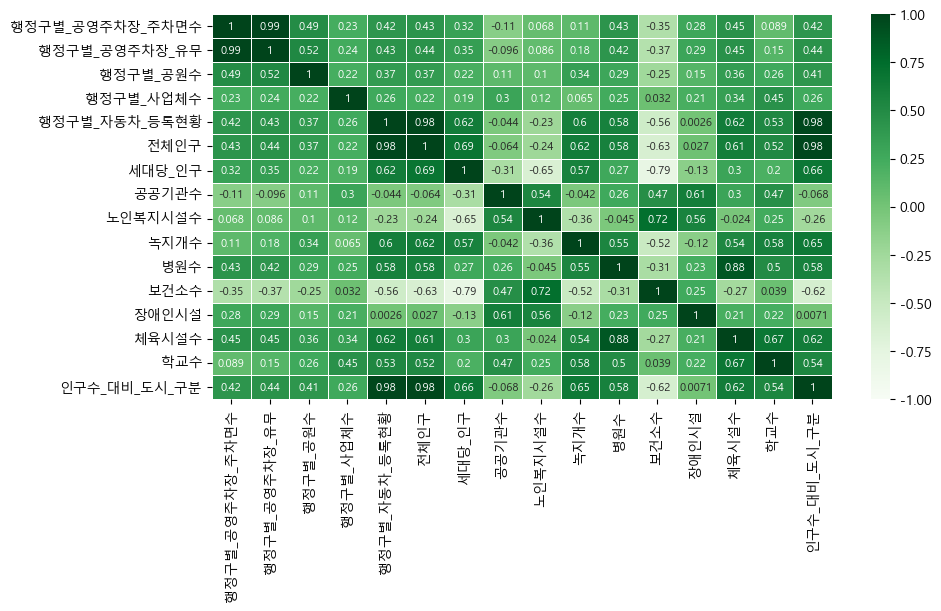

In [31]:
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams['axes.unicode_minus'] = False

corr = origin.corr(method='spearman')

plt.rcParams["figure.figsize"] = (10,5)

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상(Greys,Purples,Blues,Greens,Oranges,Reds,OrRd,PuRd,RdPu,BuPu,GnBu,PuBu,YlGnBu,PuBuGn,BuGn,YlGn)
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5, #구분선 굵기
           annot_kws={"size": 8}  # 글자 크기 조정
)

plt.show()
plt.close()

In [32]:
cnames = []
dtypes = origin.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

행정구별_공영주차장_주차면수 int64
행정구별_공영주차장_유무 int64
행정구별_공원수 int64
행정구별_사업체수 int64
행정구별_자동차_등록현황 int64
전체인구 int64
세대당_인구 float64
공공기관수 float64
노인복지시설수 float64
녹지개수 float64
병원수 float64
보건소수 float64
장애인시설 float64
체육시설수 float64
학교수 float64
['행정구별_공영주차장_주차면수', '행정구별_공영주차장_유무', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황', '전체인구', '세대당_인구', '공공기관수', '노인복지시설수', '녹지개수', '병원수', '보건소수', '장애인시설', '체육시설수', '학교수']


In [200]:
# 데이터 정규화 진행

x_train_std_df, y_train_std_df = helper.scalling(origin[cnames], '전체인구')
x_train_std_df.head()

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설,체육시설수,학교수,대도시여부_2만명이상
0,2.098268,1.732051,2.630218,3.412328,2.536349,-0.539518,4.084862,4.459009,-0.509857,3.251937,0.270501,3.279126,3.882901,1.180032,1.290994
1,-0.463840,-0.577350,-0.385319,-0.647340,-1.272298,-1.325594,-0.200895,-0.143839,-0.509857,-0.823452,0.270501,0.079979,-0.624038,-0.371791,-0.774597
2,-0.463840,-0.577350,-0.586354,-0.567942,-1.185105,-1.172746,-0.200895,-0.143839,-0.509857,-0.823452,1.352504,-0.559851,-0.832050,-0.565769,-0.774597
3,-0.463840,-0.577350,-0.385319,0.136286,-0.719948,-1.041733,-0.200895,-0.431517,-0.509857,-0.376834,0.270501,-0.559851,-0.208013,-0.371791,-0.774597
4,-0.463840,-0.577350,-0.184283,0.130245,-0.551012,-1.063568,-0.200895,0.719195,-0.509857,-0.321007,1.352504,-0.559851,-0.069338,-0.177813,-0.774597


In [202]:
cnames1=cnames.copy()
cnames1.remove('전체인구')
cnames1.remove('행정구별_공영주차장_주차면수')
print(cnames1)

['행정구별_공영주차장_유무', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황', '세대당_인구', '공공기관수', '노인복지시설수', '녹지개수', '병원수', '보건소수', '장애인시설', '체육시설수', '학교수', '대도시여부_2만명이상']


In [171]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df3 = merge_df
df3.head()

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설,체육시설수,학교수,대도시여부_2만명이상,전체인구
0,2.098268,1.732051,2.630218,3.412328,2.536349,-0.539518,4.084862,4.459009,-0.509857,3.251937,0.270501,3.279126,3.882901,1.180032,1.290994,2.375853
1,-0.463840,-0.577350,-0.385319,-0.647340,-1.272298,-1.325594,-0.200895,-0.143839,-0.509857,-0.823452,0.270501,0.079979,-0.624038,-0.371791,-0.774597,-1.203709
2,-0.463840,-0.577350,-0.586354,-0.567942,-1.185105,-1.172746,-0.200895,-0.143839,-0.509857,-0.823452,1.352504,-0.559851,-0.832050,-0.565769,-0.774597,-1.164128
3,-0.463840,-0.577350,-0.385319,0.136286,-0.719948,-1.041733,-0.200895,-0.431517,-0.509857,-0.376834,0.270501,-0.559851,-0.208013,-0.371791,-0.774597,-0.910104
4,-0.463840,-0.577350,-0.184283,0.130245,-0.551012,-1.063568,-0.200895,0.719195,-0.509857,-0.321007,1.352504,-0.559851,-0.069338,-0.177813,-0.774597,-0.661357


In [203]:
ols_result = helper.myOls(df3, y='전체인구', x = cnames1)
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                   전체인구   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.64e-09
Time:                        22:31:39   Log-Likelihood:                 35.197
No. Observations:                  24   AIC:                            -40.39
Df Residuals:                       9   BIC:                            -22.72
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.388e-17      0.019   7.46e-16

In [204]:
ols_result.table

B   표준오차         β        t   유의확률         VIF
종속변수 독립변수                                                               
전체인구 행정구별_공영주차장_유무   0.0678  0.034  0.067842   2.013*  0.075   15.708629
     행정구별_공원수       -0.0449  0.053 -0.044876  -0.840*  0.422   11.321942
     행정구별_사업체수      -0.0153  0.035 -0.015313  -0.431*  0.676    3.714007
     행정구별_자동차_등록현황   0.8187  0.068  0.818743  12.047*  0.000  238.034346
     세대당_인구          0.0231  0.049  0.023097   0.474*  0.647    7.027119
     공공기관수           0.0812  0.065  0.081221   1.242*  0.246   14.483460
     노인복지시설수         0.1436  0.079  0.143641   1.816*  0.103   27.664793
     녹지개수            0.0955  0.075  0.095533   1.267*  0.237   23.884344
     병원수             0.0739  0.064  0.073920   1.163*  0.275   17.646049
     보건소수           -0.1081  0.053 -0.108118  -2.058*  0.070   11.828079
     장애인시설          -0.0460  0.046 -0.045964  -1.001*  0.343    8.324054
     체육시설수          -0.1851  0.102 -0.185106  -1.810*  0.104   41.216556
     학교수             0.0091  0.044  0.009100   0.206*  0.842   10.765145
     대도시여부_2만명이상     0.0785  0.066  0.078502   1.195*  0.263   17.004521

In [226]:
origin.head()

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,공공기관수,노인복지시설수,녹지개수,병원수,보건소수,장애인시설,체육시설수,학교수,대도시여부_2만명이상
0,374,1,16,5141,21246,43324,2.02,9.0,17.0,0.0,75.0,1.0,6.0,70.0,12.0,1
1,0,0,1,437,1677,2628,1.66,1.0,1.0,0.0,2.0,1.0,1.0,5.0,4.0,0
2,0,0,0,529,2125,3078,1.73,1.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0,0
3,0,0,1,1345,4515,5966,1.79,1.0,0.0,0.0,10.0,1.0,0.0,11.0,4.0,0
4,0,0,2,1338,5383,8794,1.78,1.0,4.0,0.0,11.0,2.0,0.0,13.0,5.0,0


> # 자동차수를 인구로 나눠서 읍면동별 자동차 보유비율 생성 (지수가 높을수록 인구에 비례해서 차량이 많다는 것)

> # 전체인구를 n등분해서 파생변수 만들고 =>인구수_대비_도시_구분, 그걸 minmax scaling 하고

> # 군집분석 모델3개로 돌림 x축은 인구수 대비 도시 구분으로 고정 (4등분하면 0.25,.0.5,0.75,1.0 이니까 딱 일정함)

> # 거기서 자동차 보유 비율이 낮은 동네 선정 (교통량이 적다는 가설로 함,읍면동별 교통량 데이터를 못구하겠음)

> # 군집분석시 
